<a href="https://colab.research.google.com/github/prateeksrivastava07/NN-and-CNN/blob/main/Dogs_and_Cats_using_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install -q kaggle
from google.colab import files
import pandas as pd

In [83]:
files.upload()

Saving kaggle.json to kaggle (4).json


{'kaggle.json': b'{"username":"prateeksrivastava","key":"2f24edd30b13fbea1a391325ed51d9a3"}'}

In [84]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [85]:
!cp /content/kaggle.json ~/.kaggle/

In [86]:
!chmod 600 ~/.kaggle/kaggle.json

In [87]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-08-01 09:24:52          10197  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6233  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2316  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2557  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [88]:
!kaggle datasets download -d chetankv/dogs-cats-images

dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [89]:
!unzip '/content/dogs-cats-images.zip'

Archive:  /content/dogs-cats-images.zip
replace dataset/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [90]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np
from os import listdir
from os.path import isfile,join

In [91]:
train_dir='/content/dog vs cat/dataset/training_set'
val_dir='/content/dog vs cat/dataset/test_set'

In [92]:
data_gen=ImageDataGenerator(rotation_range=40, # range from zero to 40 degree
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
vertical_flip=True,
fill_mode='nearest'
)

In [93]:
test_data_gen=ImageDataGenerator(rescale=1./255)

In [94]:
# Note : In this case we are not saving these output images. Here in every shot 32 images will be generated and provided  for each iteration (mamny iterations are there in one epoch).
# in next iteration next 32 augmented images will be provided in next iteration during training.
# once one epoch will be over then again new 32 augmented images will be provided for first iteration of second epoch.
# suppose 3200 images are there. and batch size is 32 and total epochs for training is 10. it means in one epoch u have to cover all 3200 images. since 32 images are there in one batch hence 3200/32=100 iterations will be there.and in each iteration 32 new augmented images will be provided to model for training.
# Important Note: If 10 epochs are there, it means same image will be provided 10 times but in different manner (augmented image). But we are not going to save these images hence original dataset is not going to be change. However using codes we can also save these images to target_directory.
train_data=data_gen.flow_from_directory(train_dir,
target_size=(150,150),
batch_size=50,
shuffle=True,
class_mode='binary')

Found 8000 images belonging to 2 classes.


In [95]:
print(train_data.class_indices)

{'cats': 0, 'dogs': 1}


In [96]:
img,label=next(train_data) # for one batch here batch=20, image and corresponding lagels will be fetched

In [97]:
validation_data_set=test_data_gen.flow_from_directory(val_dir,
target_size=(150,150),
shuffle=True,
batch_size=50,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [98]:
print(validation_data_set.class_indices)

{'cats': 0, 'dogs': 1}


In [99]:
import matplotlib.pyplot as plt


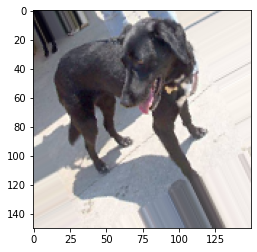

In [100]:
plt.imshow(img[0])

In [101]:
label[0]

1.0

In [102]:
import tensorflow as tf
from keras import backend as k

In [103]:
if k.image_data_format()=='channel_first':
  our_input_shape=(3,150,150) # first 150 is width of input image and second 150 is height. here we have decided the width and height
else:
  our_input_shape=(150,150,3)  

In [104]:
model=tf.keras.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=our_input_shape),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64,activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1,activation='sigmoid')                        
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)           

In [105]:
'''from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
model1 = tf.keras.Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=our_input_shape))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']) '''

"from keras.layers import Activation, Dropout, Flatten, Dense\nfrom keras.layers import Conv2D, MaxPooling2D\nmodel1 = tf.keras.Sequential()\nmodel1.add(Conv2D(32, (3, 3), input_shape=our_input_shape))\nmodel1.add(Activation('relu'))\nmodel1.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel1.add(Conv2D(32, (3, 3)))\nmodel1.add(Activation('relu'))\nmodel1.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel1.add(Conv2D(64, (3, 3)))\nmodel1.add(Activation('relu'))\nmodel1.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel1.add(Flatten())\nmodel1.add(Dense(64))\nmodel1.add(Activation('relu'))\nmodel1.add(Dropout(0.5))\nmodel1.add(Dense(1))\nmodel1.add(Activation('sigmoid'))\n\nmodel1.compile(loss='binary_crossentropy',\n              optimizer='rmsprop',\n              metrics=['accuracy']) "

In [106]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy']) #keras.optimizers.Adam(learning_rate=.0001)

In [107]:
model.fit(train_data,
steps_per_epoch=160,
validation_data=validation_data_set,   # total number of batches ie usually ceiling(total samples/samples in one batch, or you can say number of iterations in one epoch)
validation_steps=40,
epochs=10,shuffle=True)

Epoch 1/10
160/160 [==============================] - 73s 449ms/step - loss: 0.7238 - accuracy: 0.5246 - val_loss: 0.6878 - val_accuracy: 0.5250
Epoch 2/10
160/160 [==============================] - 71s 442ms/step - loss: 0.6738 - accuracy: 0.5966 - val_loss: 0.6146 - val_accuracy: 0.6550
Epoch 3/10
160/160 [==============================] - 71s 441ms/step - loss: 0.6488 - accuracy: 0.6273 - val_loss: 0.6084 - val_accuracy: 0.6915
Epoch 4/10
160/160 [==============================] - 71s 442ms/step - loss: 0.6276 - accuracy: 0.6509 - val_loss: 0.5604 - val_accuracy: 0.7195
Epoch 5/10
160/160 [==============================] - 70s 440ms/step - loss: 0.6139 - accuracy: 0.6554 - val_loss: 0.5613 - val_accuracy: 0.7100
Epoch 6/10
160/160 [==============================] - 71s 442ms/step - loss: 0.6074 - accuracy: 0.6678 - val_loss: 0.5548 - val_accuracy: 0.7180
Epoch 7/10
160/160 [==============================] - 71s 443ms/step - loss: 0.6005 - accuracy: 0.6780 - val_loss: 0.5413 - val_ac

In [113]:
# do the prediction
from keras.preprocessing import image
#img=image.load_img('/content/cats_and_dogs_small_dataset/test/cats/cat.1503.jpg',target_size=(150,150))
img=image.load_img('/content/dog vs cat/dataset/test_set/dogs/dog.4002.jpg',target_size=(150,150))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
#img.shape

In [114]:
result=model.predict(img)
print(result)

[[1.]]


In [115]:
if result[0][0]==1:
  prediction="dog"
else:
  prediction="cat"
print (prediction)

dog
